###     使用卖场数据集，按以下要求完成练习：

    1. 筛选商品门类是'Technology'的 订单日期、商品门类、总额、营利 等数据；

    2. 按照2个月为单位重采样，采样包含右边界，靠左取标签，绘制营利折线图；

    3. 将结果集的标签向后平移1个月。

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
sh=pd.read_csv(r'C:\Users\YcAllenEffy\Desktop\国际卖场.csv')
df=sh.copy()


In [3]:
df_tng=df[df['商品门类']=='Technology'][['订单日期','商品门类','总额','营利']]
df_tng

,订单日期,商品门类,总额,营利
6,1/2/2011,Technology,285.780,71.4000
15,1/2/2011,Technology,81.984,-19.1360
25,1/3/2011,Technology,1470.780,264.6000
31,1/3/2011,Technology,214.758,7.1580
33,1/3/2011,Technology,587.700,123.3600
...,...,...,...,...
51256,31-12-2014,Technology,90.930,2.7279
51259,31-12-2014,Technology,74.800,28.4200
51263,31-12-2014,Technology,135.960,10.8600
51274,31-12-2014,Technology,32.592,-25.2780


In [12]:
df_tng_2m

,总额,营利
订单日期,,
2010-11-30,45381.37002,7991.51872
2011-01-31,124868.11578,15112.76948
2011-03-31,99859.94626,12834.83016
2011-05-31,122189.00742,16377.23352
2011-07-31,169312.56872,16752.28602
...,...,...
2014-03-31,218458.32654,28051.01394
2014-05-31,239300.83744,35202.94014
2014-07-31,314703.79528,41942.04438


In [8]:
df_tng.index=pd.to_datetime(df_tng['订单日期'])
df_tng_2m=df_tng.resample('2M',closed='right',label='left').sum()

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
#设置画图 中文字体初始化
sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

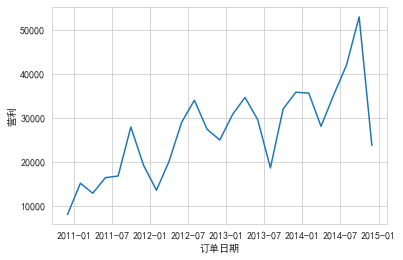

In [16]:
sns.lineplot(data=df_tng_2m,x=df_tng_2m.index,y='营利')

In [20]:
df_tng_2m.shift(1,"M")

,总额,营利
订单日期,,
2010-12-31,45381.37002,7991.51872
2011-02-28,124868.11578,15112.76948
2011-04-30,99859.94626,12834.83016
2011-06-30,122189.00742,16377.23352
2011-08-31,169312.56872,16752.28602
...,...,...
2014-04-30,218458.32654,28051.01394
2014-06-30,239300.83744,35202.94014
2014-08-31,314703.79528,41942.04438


,总额,营利
订单日期,,
2010-12-31,45381.37002,7991.51872
2011-02-28,124868.11578,15112.76948
2011-04-30,99859.94626,12834.83016
2011-06-30,122189.00742,16377.23352
2011-08-31,169312.56872,16752.28602


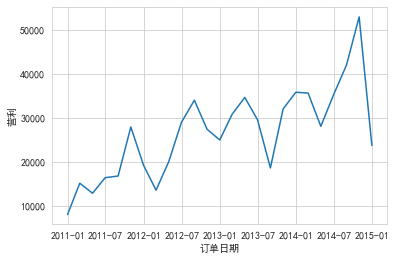

In [21]:
# 标准答案
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False

df = sh.copy()
df_t = df[df['商品门类']=='Technology']
df_t = df_t[['订单日期', '商品门类', '总额', '营利']]
df_t['订单日期'] = pd.to_datetime(df_t['订单日期'])
df_t.index = df_t['订单日期']

df_ts = df_t.resample('2M', closed='right', label='left').sum().shift(1, 'M')
display(df_ts.head())
sns.lineplot(data=df_ts, x=df_ts.index, y='营利');

###     继续使用'Technology'数据集，按以下要求完成练习：

    1. 以订单日期分组求和，设置日期索引并排序；

    2. 按照12小时单位重采样，向前填充空白值并平均分配。

In [25]:
df_t_s=df_t.resample('1d').sum()

In [29]:
df_t_s.resample('12H').ffill()/2

,总额,营利
订单日期,,
2011-01-02 00:00:00,183.88200,26.13200
2011-01-02 12:00:00,183.88200,26.13200
2011-01-03 00:00:00,1774.77600,288.41790
2011-01-03 12:00:00,1774.77600,288.41790
2011-01-04 00:00:00,443.01200,-153.67800
...,...,...
2014-12-29 00:00:00,2129.68299,103.52274
2014-12-29 12:00:00,2129.68299,103.52274
2014-12-30 00:00:00,1809.73905,344.95515


In [30]:
# 标准答案
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False

df = sh.copy()

df_t = df[df['商品门类']=='Technology']
df_t = df_t[['订单日期', '商品门类', '总额', '营利']]
df_t = df_t.groupby('订单日期').sum()
df_t.index = pd.to_datetime(df_t.index)
df_t = df_t.sort_index()

display(df_t.head(5))
df_tf = df_t.resample('12H').ffill() / 2
display(df_tf.head(10))

,总额,营利
订单日期,,
2011-01-02,367.764,52.2640
2011-01-03,3549.552,576.8358
2011-01-04,886.024,-307.3560
2011-01-06,3070.603,703.7348
2011-01-07,575.920,71.9900


,总额,营利
订单日期,,
2011-01-02 00:00:00,183.8820,26.1320
2011-01-02 12:00:00,183.8820,26.1320
2011-01-03 00:00:00,1774.7760,288.4179
2011-01-03 12:00:00,1774.7760,288.4179
2011-01-04 00:00:00,443.0120,-153.6780
2011-01-04 12:00:00,443.0120,-153.6780
2011-01-05 00:00:00,443.0120,-153.6780
2011-01-05 12:00:00,443.0120,-153.6780
2011-01-06 00:00:00,1535.3015,351.8674


### 滑动窗口联系
    继续使用'Technology'数据集，按以下要求完成练习：

    1. 以1周为单位重采样，统计总和，绘制营利折线图；

    2. 对重采样后的数据集以9条数据为一个窗口，当前数据为中心，最小可接受窗口条目数为1，统计平均值，绘制营利折线图。

In [32]:
df_tng=sh[sh['商品门类']=='Technology'][['订单日期','商品门类','总额','营利']]
df_tng.index=pd.to_datetime(df_tng['订单日期'])
df_tng

,订单日期,商品门类,总额,营利
订单日期,,,,
2011-01-02,1/2/2011,Technology,285.780,71.4000
2011-01-02,1/2/2011,Technology,81.984,-19.1360
2011-01-03,1/3/2011,Technology,1470.780,264.6000
2011-01-03,1/3/2011,Technology,214.758,7.1580
2011-01-03,1/3/2011,Technology,587.700,123.3600
...,...,...,...,...
2014-12-31,31-12-2014,Technology,90.930,2.7279
2014-12-31,31-12-2014,Technology,74.800,28.4200
2014-12-31,31-12-2014,Technology,135.960,10.8600


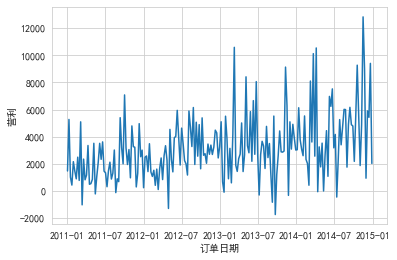

In [33]:
df_tng7=df_tng.resample('7D').sum()
sns.lineplot(data=df_tng7,x=df_tng7.index,y='营利')

In [36]:
df_tng7_rolling=df_tng7.rolling(9,center=True,min_periods=1).mean()

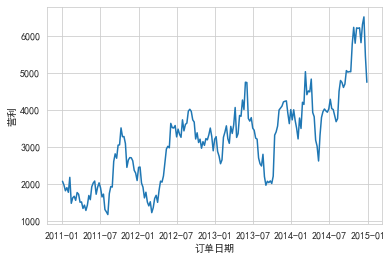

In [37]:
sns.lineplot(data=df_tng7_rolling,x=df_tng7_rolling.index,y='营利')

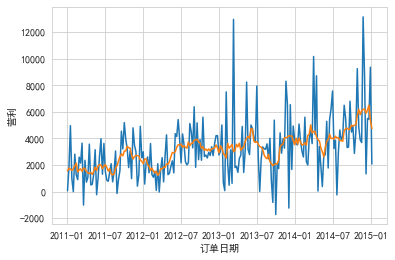

In [38]:
# 标准答案
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False

df = sh.copy()

df_t = df[df['商品门类']=='Technology']
df_t = df_t[['订单日期', '商品门类', '总额', '营利']]
df_t['订单日期'] = pd.to_datetime(df_t['订单日期'])
df_t.index = df_t['订单日期']

df_ts = df_t.resample('W').sum()
sns.lineplot(data=df_ts, x='订单日期', y='营利');

df_tr = df_ts.rolling(9, center=True, min_periods=1).mean()
sns.lineplot(data=df_tr, x='订单日期', y='营利');